# Part 1(b)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Define the Laplace distribution's PDF
def laplace_pdf(x):
    return (1/2) * np.exp(-np.abs(x))

In [12]:
# Define the Random Walk Metropolis algorithm
def random_walk_metropolis(N, s, x0):
    x = np.zeros(N)
    x[0] = x0
    for i in range(1, N):
        x_star = x[i-1] + np.random.normal(scale=s)
        r = laplace_pdf(x_star) / laplace_pdf(x[i-1])
        if np.random.uniform() < r:
            x[i] = x_star
        else:
            x[i] = x[i-1]
    return x

In [13]:
# Calculate R-hat diagnostic
def r_hat(chains):
    J, N = chains.shape
    # Calculate within-chain variances
    W = np.mean(np.var(chains, ddof=1, axis=1))
    # Calculate between-chain variance
    B_over_N = np.var(np.mean(chains, axis=1), ddof=1)
    # Estimate of variance
    var_plus = (N - 1) / N * W + B_over_N
    # Potential scale reduction factor
    R = np.sqrt(var_plus / W)
    return R

In [14]:
# Setup for multiple chains and step sizes
N = 2000  # Number of samples per chain
J = 4     # Number of chains
s_values = np.linspace(0.001, 1, 100)  # step sizes to explore
R_hat_values = []

In [15]:
# Run the algorithm and calculate R-hat for each step size
for s in s_values:
    # Generate J chains for each s value
    chains = np.array([random_walk_metropolis(N, s, np.random.normal()) for _ in range(J)])
    # Calculate R-hat for these J chains
    R_hat_values.append(r_hat(chains))

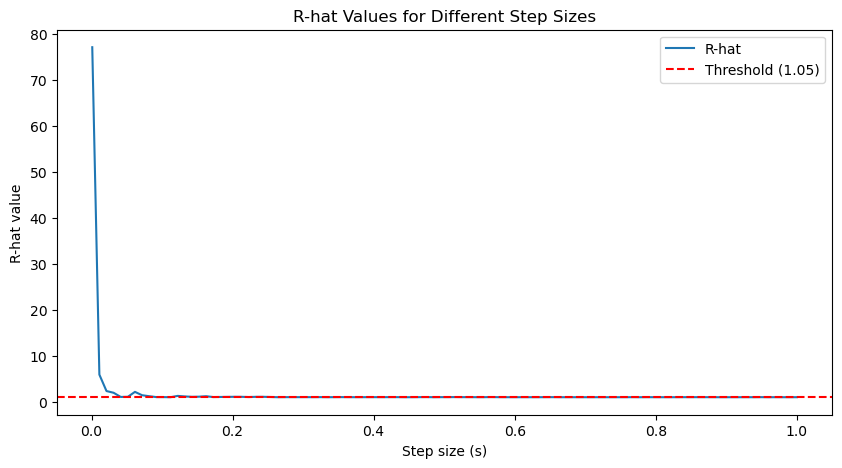

In [16]:
# Plot the R-hat values for different step sizes
plt.figure(figsize=(10, 5))
plt.plot(s_values, R_hat_values, label='R-hat')
plt.axhline(1.05, color='red', linestyle='--', label='Threshold (1.05)')
plt.xlabel('Step size (s)')
plt.ylabel('R-hat value')
plt.title('R-hat Values for Different Step Sizes')
plt.legend()
plt.show()